In [1]:
import pandas as pd

df = pd.read_csv("spotify_dataset/top50_new.csv")
df

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [2]:
list(df.columns)

['Unnamed: 0',
 'Track.Name',
 'Artist.Name',
 'Genre',
 'Beats.Per.Minute',
 'Energy',
 'Danceability',
 'Loudness..dB..',
 'Liveness',
 'Valence.',
 'Length.',
 'Acousticness..',
 'Speechiness.',
 'Popularity']

In [3]:
import unicodedata

def remove_accents(x):
    return (unicodedata.normalize('NFD', x)
                       .encode('ascii', 'ignore')
                       .decode('utf-8'))


word_cols = df.dtypes[lambda x: x.eq('object')].index.tolist()
df[word_cols] = df[word_cols].applymap(remove_accents)

C:\Users\cmati\AppData\Local\Temp\ipykernel_29520\3894214638.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[word_cols] = df[word_cols].applymap(remove_accents)


In [4]:
def filter_and_replace(df, Genre, pop):
    
    df[Genre] = df[Genre].apply(lambda x: pop if pop in x else x)
    return df

df = filter_and_replace(df, 'Genre', 'pop')

In [5]:
def filter_and_replace(df, Genre, reggaeton):
    
    df[Genre] = df[Genre].apply(lambda x: reggaeton if reggaeton in x else x)
    return df

df = filter_and_replace(df, 'Genre', 'reggaeton')

In [6]:
def filter_and_replace(df, Genre, rap):
    
    df[Genre] = df[Genre].apply(lambda x: rap if rap in x else x)
    return df

df = filter_and_replace(df, 'Genre', 'rap')

In [7]:
def filter_and_replace(df, column_name, keyword):
    df[column_name] = df[column_name].apply(lambda x: keyword if keyword in x else x)
    return df

df = filter_and_replace(df, 'Genre', 'hip hop')

In [8]:
def filter_and_replace(df, column_name, target, replacement):
    df[column_name] = df[column_name].apply(lambda x: x.replace(target, replacement) if target in x else x)
    return df

df = filter_and_replace(df, 'Genre', 'hip hop', 'rap')

In [9]:
def filter_and_replace(df, column_name, target, replacement):
    df[column_name] = df[column_name].apply(lambda x: x.replace(target, replacement) if target in x else x)
    return df

df = filter_and_replace(df, 'Genre', 'reggaeton', 'latin')

In [10]:
def filter_and_replace(df, column_name, targets, replacement):
    
    if not isinstance(targets, list):
        targets = [targets] 

    def replace_targets(text):
        for target in targets:
            if target in text:
                text = text.replace(target, replacement)
        return text

    df[column_name] = df[column_name].apply(replace_targets)
    return df

targets = ['brostep', 'escape room', 'big room']  
df = filter_and_replace(df, 'Genre', targets, 'edm')

In [11]:
def filter_and_replace(df, column_name, target, replacement):
    df[column_name] = df[column_name].apply(lambda x: x.replace(target, replacement) if target in x else x)
    return df

df = filter_and_replace(df, 'Genre', 'boy band', 'pop')

In [12]:
def filter_and_replace(df, column_name, target, replacement):
    df[column_name] = df[column_name].apply(lambda x: x.replace(target, replacement) if target in x else x)
    return df

df = filter_and_replace(df, 'Genre', 'r&b en espanol', 'pop')

In [13]:
df.Genre.unique()

array(['pop', 'latin', 'rap', 'edm'], dtype=object)

In [14]:
df['Genre'].str.split(',').explode().value_counts().nlargest(4).to_dict()

{'pop': 25, 'latin': 9, 'rap': 9, 'edm': 7}

In [15]:
df

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Senorita,Shawn Mendes,pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,latin,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,rap,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,pop,135,43,70,-11,10,56,194,33,38,95


In [16]:
df.to_csv('top50_new.csv', index=False)

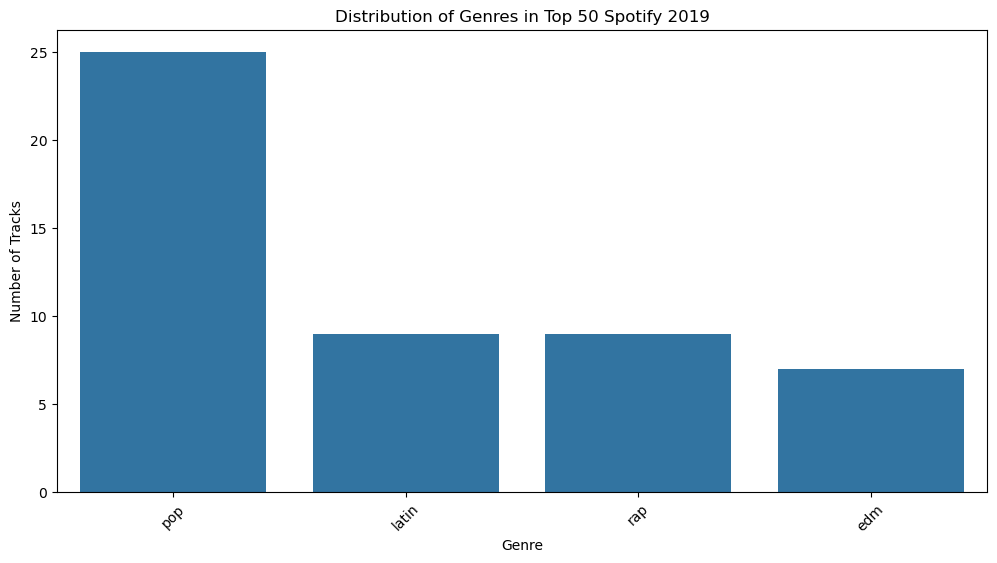

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Distribution of Genres in Top 50 Spotify 2019')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

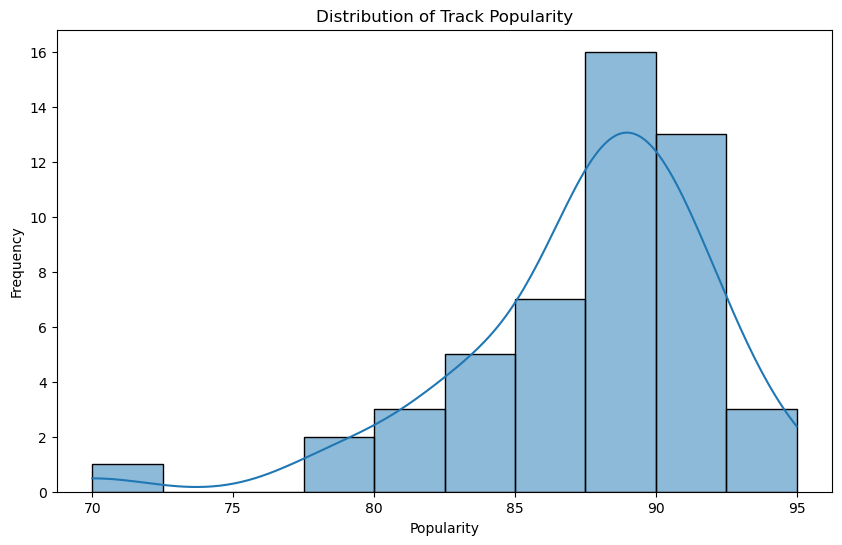

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=10, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

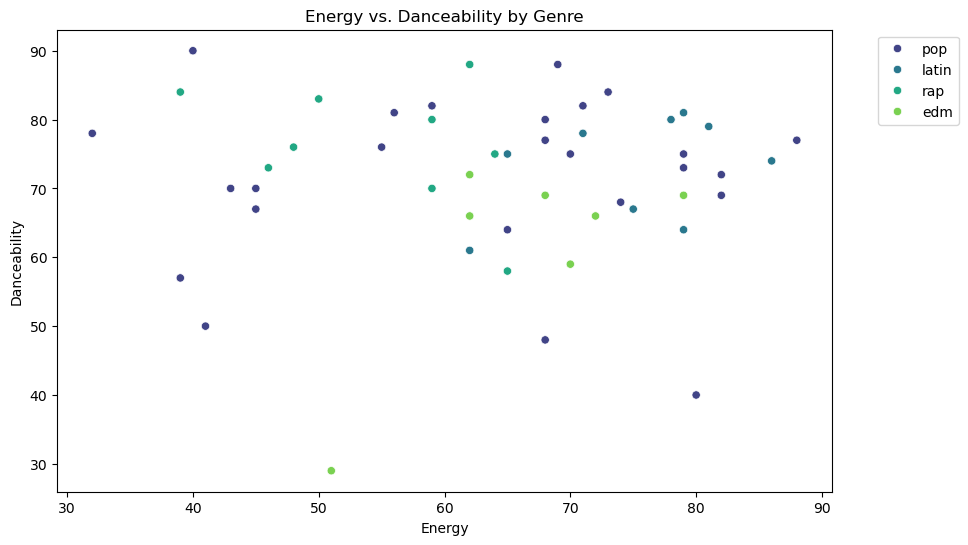

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Danceability', data=df, hue='Genre', palette='viridis')
plt.title('Energy vs. Danceability by Genre')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()